# Step 1: Installation and Setup

In [20]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [22]:
# Importing the dataset 
from PIL import Image
import os, sys
path = "/Users/nhiphamleyen/Desktop/DATASET"

dirs_train_o = os.listdir(path + "/TRAIN/O")
dirs_train_r = os.listdir(path + "/TRAIN/R")
dirs_test_o = os.listdir(path + "/TEST/O")
dirs_test_r = os.listdir(path + "/TEST/R")

In [60]:
# Resize image using Pillow
class_name = ['O', 'R']
# Create training set
x_train = []
x_train.append(dirs_train_o)
x_train.append(dirs_train_r)

# Create testing test
x_test = []
x_test.append(dirs_test_o)
x_test.append(dirs_test_r)

def modify_image(dataset, pathname):
  names = []
  labels = []
  for type in range(2):
    for item in dataset[type]:
      path_tmp = path + "/" + pathname + "/" + class_name[type] + "/"
      if os.path.isfile(path_tmp+item):
        im = Image.open(path_tmp+item)
        imResize = im.resize((32, 32), Image.ANTIALIAS)
        if imResize.mode != 'RGB':
          imResize = imResize.convert('RGB')
        names.append(imResize)
        labels.append(type)
  return names, labels

names_train, labels_train = modify_image(x_train, "TRAIN")
names_test, labels_test = modify_image(x_test, "TEST")
print("Done")

Done


In [61]:
# Train
x_train = np.array([np.array(fname) for fname in names_train])
y_train = np.array(labels_train)

# Test
x_test = np.array([np.array(fname) for fname in names_test])
y_test = np.array(labels_test)

In [62]:
np.max(x_train), np.min(x_train), np.mean(x_train)

(255, 0, 161.16512345785875)

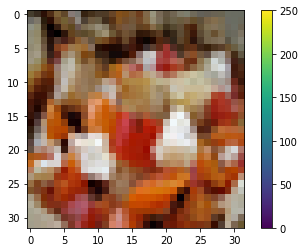

In [63]:
# Data Exploration
x_train.shape, y_train.shape
plt.figure()
plt.imshow(x_train[12])
plt.colorbar()

In [64]:
# Sanity check 
print(labels_train)
print(labels_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [65]:
# Sanity check
print(y_train[12])

0


In [66]:
# Normalizing the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

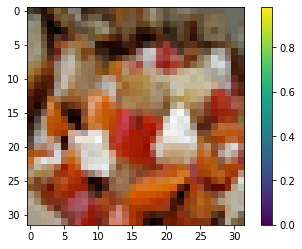

In [67]:
plt.figure()
plt.imshow(x_train[12])
plt.colorbar()

In [68]:
# Flattening the dataset
x_train.shape, y_train.shape

((22564, 32, 32, 3), (22564,))

# Step 3: Building the CNN

In [69]:
# Defining the object
model = tf.keras.models.Sequential()

In [70]:
# Adding first convolutional layer
# 1) number of filters, filters(kernel) = 32
# 2) kernel size = 3
# 3) padding = same padding or valid padding
# 4) activation = ReLU
# 5) input shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32,32,3]))

In [71]:
# Adding second CNN layer and maxpool layer
# 1) number of filters, filters(kernel) = 32
# 2) kernel size = 3
# 3) padding = same padding or valid padding
# 4) activation = ReLU
# 5) input shape = (32, 32, 3)
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

# maxpool layer parameters
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [72]:
# Adding third CNN layer
# 1) number of filters, filters(kernel) = 64
# 2) kernel size = 3
# 3) padding = same padding or valid padding
# 4) activation = ReLU
# 5) input shape = (32, 32, 3)
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

In [73]:
# Adding fourth CNN layer and maxpool layer
# 1) number of filters, filters(kernel) = 64
# 2) kernel size = 3
# 3) padding = same padding or valid padding
# 4) activation = ReLU
# 5) input shape = (32, 32, 3)
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

# maxpool layer parameters
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [74]:
# Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [75]:
# Adding the flattening layer
model.add(tf.keras.layers.Flatten())

In [76]:
# Adding first dense layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [77]:
# Adding second dense layer (output layer)
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)         

# Step 4: Training the Model

In [79]:
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [80]:
model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
22564/22564 [==============================] - 65s 3ms/sample - loss: 0.4622 - sparse_categorical_accuracy: 0.7939
Epoch 2/10
22564/22564 [==============================] - 71s 3ms/sample - loss: 0.3955 - sparse_categorical_accuracy: 0.8277
Epoch 3/10
22564/22564 [==============================] - 67s 3ms/sample - loss: 0.3731 - sparse_categorical_accuracy: 0.8370
Epoch 4/10
22564/22564 [==============================] - 78s 3ms/sample - loss: 0.3555 - sparse_categorical_accuracy: 0.8499
Epoch 5/10
22564/22564 [==============================] - 61s 3ms/sample - loss: 0.3374 - sparse_categorical_accuracy: 0.8565
Epoch 6/10
22564/22564 [==============================] - 69s 3ms/sample - loss: 0.3174 - sparse_categorical_accuracy: 0.8690
Epoch 7/10
22564/22564 [==============================] - 61s 3ms/sample - loss: 0.3067 - sparse_categorical_accuracy: 0.8722
Epoch 8/10
22564/22564 [==============================] - 64s 3ms/sample - loss: 0.2917 - sparse_categorical_accuracy:

# Step 5: Model Evaluation and Prediction

In [81]:
# Evaluate model performance
test_loss, test_acc = model.evaluate(x_test, y_test)

2513/2513 [==============================] - 2s 788us/sample - loss: 0.2496 - sparse_categorical_accuracy: 0.9073


In [82]:
print("Test Accuracy is: {}".format(test_acc))

Test Accuracy is: 0.9072821140289307


In [83]:
# Predictions
y_pred = model.predict_classes(x_test)

In [84]:
print(y_pred[101]), print(y_test[101])

0
0


(None, None)

In [85]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1319   82]
 [ 151  961]]


In [86]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9072821329088738
